## Практична робота №1. Класифікатор  зображень за допомогою TensorFlow
Мета роботи полягає в ознайомленні з роботою бібліотеки Tensorflow шляхом використання наявної натренованої нейронної мережі для класифікації зображень.
BOOK 1  p.72

1. Архитектура ResNet50 [link](https://iq.opengenus.org/resnet50-architecture/)
2. DataSet на котром натренирована.
3. Примеры
4. Оценка точности предсказания.
5. Test
ssss

In [ ]:
# Імпорт усіх бібліотек
import tensorflow as tf 
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  661k  100  661k    0     0  2864k      0 --:--:-- --:--:-- --:--:-- 2864k


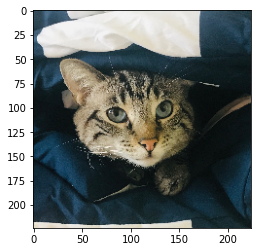

In [ ]:
# Завантаження зображення прикладу (зображення кота) для тесту готової нейромережі ResNet50
!curl https://raw.githubusercontent.com/PracticalDL/Practical-Deep-Learning-Book/master/sample-images/cat.jpg --output cat.jpg
img_path_cat = 'cat.jpg'
# Виведення цього ж зображення у форматі 224x224 на екран
img = image.load_img(img_path_cat, target_size=(224, 224))
plt.imshow(img)
plt.show()

In [ ]:
# Функція для класифікації зображень з використанням нейромережі, приймає в аргументах шлях до зображення
def predict(img_path):
  img = image.load_img(img_path, target_size=(224,224)) # завантаження зображення у формат Python Imaging Library (PIL)
  model = tf.keras.applications.resnet50.ResNet50() # імпорт готової нейромережі ResNet50 (за допомогою .application можна імпортувати чимало готових моделей)
  img_array = image.img_to_array(img) # конвертація зображення в numpy масив
  img_batch = np.expand_dims(img_array, axis=0) #додавання вимірювання для довжини масиву
  img_preprocessed = preprocess_input(img_batch) # Попередня обробка тензору або масиву Numpy, що кодує пакет зображень.
  prediction = model.predict(img_preprocessed) # робота моделі
  # Виведення прогнозів 10 класів, перші 3: tabby, egyptian_cat, tiger_cat у форматі від 0 до 1, тобто виводить "наскільки дане зображення
  # Належить до одного з даних класів". Другий аргумент top - означає скільки ми виведемо класів із 1000, з імовірностями наскільки схожий об'єкт на один із виведених класів
  # За замовчуванням аргумент top=5
  # В результаті виконання функції decode_predictions виводиться: class_name, class_description, score
  print(decode_predictions(prediction, top=4)) 

In [ ]:
predict(img_path_cat) # використовуємо зобрашення кота для класифікації

1/1 [==============================] - 2s 2s/step
[[('n02123045', 'tabby', 0.5681728), ('n02124075', 'Egyptian_cat', 0.22223161), ('n02123159', 'tiger_cat', 0.06103408), ('n02127052', 'lynx', 0.029539213)]]


В результаті виконання методу predict, тобто класифікації, можемо зробити висновок що на 56% - зображення схоже на tabby (порода котів), 22% - Egyptian_cat (Єгипетський кіт) та 3% - lynx (рись). Навіть на 1.7% це зображення схоже на **поліетиленовий пакет**!

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2231k  100 2231k    0     0  17.0M      0 --:--:-- --:--:-- --:--:-- 17.1M


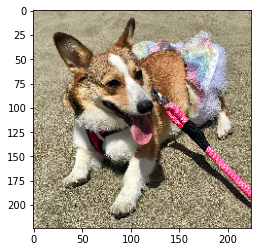

1/1 [==============================] - 1s 1s/step
[[('n02113186', 'Cardigan', 0.8349484), ('n02113023', 'Pembroke', 0.15549438), ('n02110806', 'basenji', 0.0027703457), ('n02086910', 'papillon', 0.0018256829)]]


In [ ]:
# Додатково завантажуємо зображення собаки для другого тесту
!curl https://raw.githubusercontent.com/PracticalDL/Practical-Deep-Learning-Book/master/sample-images/dog.jpg --output dog.jpg
img_path_dog = 'dog.jpg'
# Виведення цього ж зображення у форматі 224x224 на екран
img = image.load_img(img_path_dog, target_size=(224, 224))
plt.imshow(img)
plt.show()
predict(img_path_dog) # Використовуємо зобрашення собаки для класифікації

В результаті виконання методу predict, тобто класифікації, можемо зробити висновок що на 86% - зображення схоже на Cardigan (порода собак), 15% - pembroke (ще одна порода собак) та далі ідуть мінімальні вірогідності на що саме ця собака ще може бути схожа.

Тепер для експерименту спробуємо модифікувати нейронну мережу Resnet50 шляхом додавання більшої кількості шарів до моделі, ми можемо просто модифікувати останні шари моделі відповідно до наших потреб. Модель ResNet50 складається з 50 шарів, включаючи шар згортки, декілька залишкових блоків і повністю з'єднаний шар. Ми можемо додати більше шарів, додавши більше повністю з'єднаних шарів або додавши більше залишкових блоків.

In [ ]:
data_to_train=np.load('train_data_batch_1.npz')
data_to_test=np.load('val_data.npz')

images_to_train=data_to_train['data']
train_labels=data_to_train['labels']
images_to_test=data_to_test['data']
test_labels=data_to_test['labels']

train_images = []
test_images = []
for img in images_to_train:
    img_resized = cv2.resize(img, (32, 32))
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    train_images.append(img_rgb)

for img in images_to_test:
    img_resized = cv2.resize(img, (32, 32))
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    test_images.append(img_rgb)

FileNotFoundError: ignored

In [ ]:
images_normalized = train_images / 255.0

In [ ]:
# Завантажемо модель ResNet50 без верхнього (класифікаційного) шару
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Додайте кілька шарів поверх моделі ResNet50

x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1000, activation='softmax')(x)

# Визначення нову модель
model = Model(inputs=base_model.input, outputs=predictions)

# Замороземо ваги шарів ResNet50
for layer in base_model.layers:
    layer.trainable = False

# Складіть модель
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
train_images.shape
train_labels.shape

AttributeError: ignored

In [ ]:
# Тренування моделі
model.fit(train_images, train_labels, epochs=10, batch_size=32)

ValueError: ignored